# Modelo del Algoritmo Genético

Este documento detalla el modelo utilizado en el algoritmo genético para resolver el problema de ruteo vehicular. Se comparan las diferencias entre este modelo y el modelo matemático original implementado en etapas previas del proyecto.

## 1. Descripción del Problema

El objetivo del algoritmo genético es encontrar una solución aproximada al problema de ruteo vehicular bajo las siguientes suposiciones simplificadas:

- Un solo depósito con capacidad infinita.
- Un solo vehículo con capacidad infinita y un tipo específico: Gasolina/Gas.
- No se considera la recarga de combustible, el manejo de múltiples vehículos, ni las restricciones específicas de capacidad del depósito o del vehículo.
- El modelo busca minimizar el costo total de operación, el cual incluye costos de distancia, tiempo, carga y descarga, mantenimiento, y recarga (aunque estas últimas son constantes en este caso).

## 2. Supuestos Simplificados

### Supuestos en el Modelo Genético

- **Depósito único**: Se selecciona un único depósito que actúa como punto de inicio y fin de las rutas.
- **Vehículo único**: Se utiliza un solo vehículo con capacidad infinita, eliminando restricciones de asignación y manejo de flotas.
- **Sin restricciones de capacidad**: Los costos de operación relacionados con la capacidad de carga se calculan, pero no se imponen límites de carga.
- **Distancia fija entre nodos**: La matriz de distancias se calcula previamente usando la fórmula de Haversine, asegurando una métrica consistente entre nodos.
- **Ruta circular**: Cada ruta debe comenzar y terminar en el depósito, pasando por todos los clientes exactamente una vez.
- **Modelo heurístico**: En lugar de resolver el modelo matemático mediante programación lineal entera, se utiliza un enfoque basado en heurísticas para obtener soluciones en menor tiempo.

## 3. Modelo del Algoritmo Genético

### 3.1 Población Inicial

Se genera una población inicial de soluciones (rutas) de manera aleatoria.  
Cada solución es una permutación de los clientes, comenzando y terminando en el depósito.

### 3.2 Función de Aptitud

La aptitud evalúa el costo total asociado a cada ruta en función de:

- **Costo de distancia**: Calculado como la distancia total recorrida multiplicada por la tarifa de flete.
- **Costo de tiempo**: Basado en la velocidad del vehículo y el costo por minuto.
- **Costo de carga y descarga**: Proporcional al tiempo necesario para manejar la demanda total de los clientes en la ruta.
- **Costo de mantenimiento**: Fijo por vehículo.
- **Costo de recarga**: Proporcional a la distancia recorrida, pero constante en este caso debido a la capacidad infinita del vehículo.

### 3.3 Operadores Genéticos

- **Selección**  
  Se implementa un mecanismo de selección por torneo:
  - Se seleccionan aleatoriamente $k$ individuos de la población.
  - Se evalúan sus aptitudes, y el mejor individuo se selecciona para la siguiente generación.

- **Cruce (Crossover)**  
  Se utiliza el cruce por orden (Order Crossover, OX):
  - Se elige un segmento aleatorio de la ruta del primer padre.
  - El segmento seleccionado se copia al hijo en la misma posición.
  - Los nodos restantes se completan en orden según la ruta del segundo padre, omitiendo duplicados.

- **Mutación**  
  Se emplea la mutación por intercambio:
  - Con una probabilidad determinada (tasa de mutación), se seleccionan dos clientes aleatorios en la ruta y se intercambian sus posiciones.

### 3.4 Parámetros del Algoritmo

- Tamaño de población: 50 individuos.
- Número de generaciones: 100.
- Tasa de mutación: 5%.
- Tamaño del torneo: 3 individuos.

### 3.5 Proceso Iterativo

1. Generar población inicial.
2. Evaluar la función de aptitud para cada individuo.
3. Seleccionar individuos mediante torneo.
4. Generar nueva población aplicando cruce y mutación.
5. Repetir hasta alcanzar el número de generaciones o la convergencia del costo.

## 4. Diferencias Principales con el Modelo Original

| Aspecto                | Modelo Matemático Original                        | Modelo Genético Simplificado                  |
|------------------------|----------------------------------------------------|-----------------------------------------------|
| **Depósitos**          | Varios depósitos con capacidad limitada.         | Un solo depósito con capacidad infinita.     |
| **Vehículos**          | Flota de vehículos con diferentes capacidades y tipos. | Un solo vehículo con capacidad infinita.     |
| **Restricciones**      | Complejas restricciones de capacidad, rutas y costos. | Restricciones mínimas: se optimizan rutas simples. |
| **Método de solución** | Programación lineal entera (exacta).              | Heurística basada en algoritmos genéticos.    |
| **Costos de operación**| Calculados de forma detallada según rutas, tipos y nodos. | Simplificados a costos de distancia, tiempo y fijos. |
| **Consideración de carga** | Limitada por la capacidad del vehículo y el depósito. | No se impone límite de carga.                |

## 5. Ventajas y Limitaciones

### Ventajas

- **Simplicidad**: Menor complejidad en la implementación.
- **Velocidad**: Heurísticas como los algoritmos genéticos son rápidas y aptas para escenarios grandes.
- **Escalabilidad**: Fácil de extender para incluir restricciones adicionales.

### Limitaciones

- **Aproximación**: Las soluciones obtenidas no garantizan la optimalidad global.
- **Supuestos**: La eliminación de restricciones clave (capacidad, flotas, recarga) puede generar resultados menos realistas.
- **Convergencia**: Depende de parámetros como tasa de mutación y número de generaciones.

## 6. Resultados y Análisis

El algoritmo genético proporciona una solución rápida y aproximada al problema, útil en casos donde:

- Las restricciones son mínimas.
- Es necesario obtener resultados en poco tiempo.
- Se puede tolerar la suboptimalidad.

En este caso, la mejor ruta y su costo se presentan como aproximaciones válidas para el escenario simplificado definido.

## 7. Futuras Mejoras

- Introducir múltiples depósitos y vehículos con capacidades finitas.
- Considerar restricciones adicionales, como la recarga de combustible.
- Refinar la función de aptitud para reflejar mejor los costos operativos reales.
- Utilizar metaheurísticas híbridas para mejorar la convergencia.


## Codigo del algoritmo

Selecciona un caso base (0-4):
Tipos de Vehículos Disponibles: dict_keys(['Gasolina/Gas', 'Drone', 'Solar EV'])
Datos cargados exitosamente: 0.0324 segundos
https://router.project-osrm.org/table/v1/driving/-74.09893796560621,4.59795431125545;-74.07557103763986,4.687820646838871;-74.10708524062704,4.70949446000624;-74.09727965657427,4.605029068682624;-74.16464148202755,4.648463876533332;-74.12083799988112,4.662137416953968;-74.02213076607309,4.697499030379109;-74.17207549744595,4.649416884236942;-74.15615257246444,4.606310650273935;-74.09041145358674,4.557379705282216;-74.17802255204528,4.591594072172954;-74.1015410917749,4.7564172406324055;-74.09690889182339,4.646217006050524;-74.1219200708342,4.725912125314368;-74.0942948461378,4.604168478560718;-74.11138839002187,4.557320898243896;-74.12463941285208,4.615869066082658;-74.12456164551857,4.656402930181292;-74.04990580408855,4.706188309535041;-74.121866801394,4.746624762561149;-74.02454895778163,4.746517184687941;-74.08683592702927,4.62

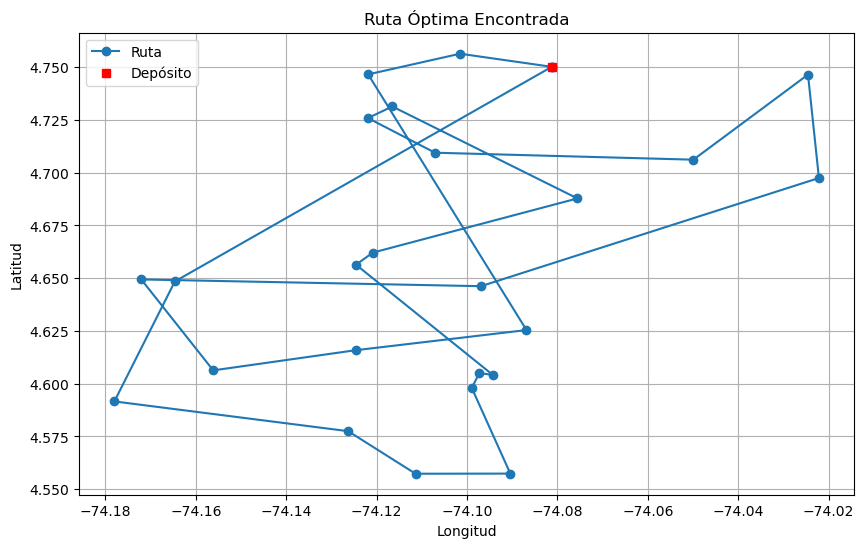

La mejor ruta ha sido guardada en 'mejor_ruta.csv'


In [1]:
import pandas as pd
import numpy as np
import random
import math
import requests
import time
import os
import matplotlib.pyplot as plt
import csv

# Inicializar el diccionario data
data = {
    "N": [],
    "TP": ['Cliente', 'Depósito'],
    "V": [],
    "TV": ['Gasolina/Gas'],
    "CV": ['Terrestre'],
    "CategoriaTipoVehiculo": {
        'Gasolina/Gas': 'Terrestre',
    },

    "CostoCarga": None,
    "CostoDescarga": None,
    "VelocidadCarga": None,
    "VelocidadDescarga": None,

    "TipoNodo": {},
    "UbicacionNodo": {},
    "ProductaEnvio": {},
    "CapacidadDeposito": {},

    "TipoVehiculo": {},
    "CapacidadVehiculo": {},
    "RangoVehiculo": {},
    "TarifaFleteTipoVehiculo": {},
    "TarifaHorariaTipoVehiculo": {},
    "MantenimientoTipoVehiculo": {},
    "CostoRecargaTipoVehiculo": {},
    "TiempoRecargaTipoVehiculo": {},
    "VelocidadTipoVehiculo": {},
    "EficienciaTipoVehiculo": {},

    "d": None
}

def is_float_with_zero_decimals(s):
    try:
        num = float(s)
        return num.is_integer()
    except ValueError:
        return False

# Función para leer los clientes
def readClients(data, client_csv_paths):
    # Código original de tu función
    client_ids = set()
    for path in client_csv_paths:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Cliente CSV no encontrado: {path}")
        df = pd.read_csv(path)
        required_columns = ['ClientID', 'Longitude', 'Latitude']
        if not all(col in df.columns for col in required_columns):
            raise ValueError(f"El CSV de clientes carece de columnas requeridas: {required_columns}")
        for index, row in df.iterrows():
            client_id = row['ClientID']
            if client_id in client_ids:
                raise ValueError(f"ID de cliente duplicado: {client_id}")
            client_ids.add(client_id)
            client_id = str(client_id)
            client_id = "c" + client_id
            data['N'].append(client_id)
            data['TipoNodo'][client_id] = 'Cliente'
            Product = 0
            for p in ['Product','Product-Type-A','Product-Type-B','Product-Type-C']: 
                Product += row.get(p,0)
            if Product < 0:
                raise ValueError(f"La Demanda debe ser >= 0 para ClientID {client_id}")
            Product = float(Product)
            data['ProductaEnvio'][client_id] = Product
            longitude = row['Longitude']
            latitude = row['Latitude']
            if not (-180 <= longitude <= 180 and -90 <= latitude <= 90):
                raise ValueError(f"Coordenadas inválidas para ClientID {client_id}")
            longitude = float(longitude)
            latitude = float(latitude)
            data['UbicacionNodo'][client_id] = (latitude, longitude)

# Función para leer los depósitos
def read_depots(data, depot_csv_paths):
    depot_ids = set()
    first_depot_added = False  # Variable para controlar el primer depósito
    for path in depot_csv_paths:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Depot CSV file not found: {path}")
        df = pd.read_csv(path)
        required_columns = ['DepotID', 'Longitude', 'Latitude']
        if not all(col in df.columns for col in required_columns):
            raise ValueError(f"Depot CSV missing required columns: {required_columns}")
        for index, row in df.iterrows():
            if first_depot_added:
                break  # Solo agregamos el primer depósito
            depot_id = row['DepotID']
            if depot_id in depot_ids:
                raise ValueError(f"Duplicate DepotID found: {depot_id}")
            depot_ids.add(depot_id)
            depot_id = str(depot_id)
            depot_id = "d" + (str(int(float(depot_id))) if is_float_with_zero_decimals(depot_id) else depot_id)
            data['N'].append(depot_id)
            data['TipoNodo'][depot_id] = 'Depósito'
            longitude = row['Longitude']
            latitude = row['Latitude']
            if not (-180 <= longitude <= 180 and -90 <= latitude <= 90):
                raise ValueError(f"Invalid coordinates for DepotID {depot_id}")
            longitude = float(longitude)
            latitude = float(latitude)
            data['UbicacionNodo'][depot_id] = (latitude, longitude)
            # Asignar capacidad infinita al depósito
            data['CapacidadDeposito'][depot_id] = float('inf')
            first_depot_added = True  # Marcamos que ya hemos agregado el primer depósito
    if not first_depot_added:
        raise ValueError("No depot found in the provided files.")

def read_vehicles(data, vehicle_csv_paths):
    vehicle_id = 1
    vehicle_added = False  # Variable para indicar si ya se añadió el primer vehículo 'Gasolina/Gas'
    for path in vehicle_csv_paths:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Archivo CSV de vehículos no encontrado: {path}")
        df = pd.read_csv(path)
        required_columns = ['VehicleType', 'Capacity', 'Range']
        if not all(col in df.columns for col in required_columns):
            raise ValueError(f"El CSV de vehículos carece de columnas requeridas: {required_columns}")
        for index, row in df.iterrows():
            vehicle_type_raw = row['VehicleType']
            if vehicle_type_raw == 'Gas Car':
                vehicle_type = 'Gasolina/Gas'
                # Solo agregamos el primer vehículo 'Gasolina/Gas'
                if not vehicle_added:
                    capacity = row['Capacity']
                    if capacity < 0:
                        raise ValueError(f"La capacidad debe ser >= 0 para VehicleID {vehicle_id}")
                    range_ = row['Range']
                    if range_ < 0:
                        raise ValueError(f"El rango debe ser >= 0 para VehicleID {vehicle_id}")
                    vehicle_id_str = "v" + str(vehicle_id)
                    data['V'].append(vehicle_id_str)
                    data['TipoVehiculo'][vehicle_id_str] = vehicle_type
                    data['CapacidadVehiculo'][vehicle_id_str] = float(capacity)
                    data['RangoVehiculo'][vehicle_id_str] = float(range_)
                    vehicle_added = True  # Marcamos que ya hemos agregado el primer vehículo
                else:
                    # Si ya hemos agregado el vehículo, continuamos sin hacer nada
                    continue
            else:
                continue  # Ignoramos los vehículos que no son 'Gas Car'

    if not vehicle_added:
        raise ValueError("No se encontró ningún vehículo de tipo 'Gasolina/Gas' en los archivos proporcionados.")

# Función para leer los costos de carga y descarga
def readLoadingProducts(data, loading_products_csv_paths):
    # Código original de tu función
    data['CostoCarga'] = 0
    data['CostoDescarga'] = 0
    data['VelocidadCarga'] = 0
    data['VelocidadDescarga'] = 0

# Función para leer los tipos de vehículos
def readVehicleTypes(data, vehicle_types_csv_paths):
    # Código original de tu función
    vehicle_types_set = set()
    for path in vehicle_types_csv_paths:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Tipos de vehículos CSV no encontrado: {path}")
        df = pd.read_csv(path)
        required_columns = ['Vehicle', 'Freight Rate [COP/km]', 'Time Rate [COP/min]',
                            'Daily Maintenance [COP/day]', 'Recharge/Fuel Cost [COP/(gal or kWh)]',
                            'Recharge/Fuel Time [min/10 percent charge]', 'Avg. Speed [km/h]',
                            'Gas Efficiency [km/gal]', 'Electricity Efficency [kWh/km]']
        if not all(col in df.columns for col in required_columns):
            raise ValueError(f"El CSV de tipos de vehículos carece de columnas requeridas: {required_columns}")
        for index, row in df.iterrows():
            vehicle = row['Vehicle']
            
            # Mapear 'Gas Car' a 'Gasolina/Gas'
            if vehicle == 'Gas Car':
                vehicle = 'Gasolina/Gas'
            
            if vehicle in vehicle_types_set:
                raise ValueError(f"Tipo de vehículo duplicado: {vehicle}")
            vehicle_types_set.add(vehicle)
            data['TarifaFleteTipoVehiculo'][vehicle] = row['Freight Rate [COP/km]']
            data['TarifaHorariaTipoVehiculo'][vehicle] = row['Time Rate [COP/min]']
            data['MantenimientoTipoVehiculo'][vehicle] = row['Daily Maintenance [COP/day]']
            data['CostoRecargaTipoVehiculo'][vehicle] = row['Recharge/Fuel Cost [COP/(gal or kWh)]']
            data['TiempoRecargaTipoVehiculo'][vehicle] = row['Recharge/Fuel Time [min/10 percent charge]']
            data['VelocidadTipoVehiculo'][vehicle] = row['Avg. Speed [km/h]']
            data['EficienciaTipoVehiculo'][vehicle] = row['Gas Efficiency [km/gal]']

# Función para calcular la matriz de distancias
def compute_distance_matrix(data):
    nodes = data['N']
    node_coords = [data['UbicacionNodo'][i] for i in nodes]
    
    # Prepare coordinates for the OSRM API in lon,lat format
    coords_str = ';'.join([f"{lon},{lat}" for lat, lon in node_coords])
    
    # OSRM distance computation for all ground vehicles (single call)
    ground_vehicle_types = [cv for cv in data['CV'] if cv != 'Aereo']
    url = f"https://router.project-osrm.org/table/v1/driving/{coords_str}"
    print(url)
    params = {
        'annotations': 'distance'
    }
    try:
        # Single API call
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an HTTPError if status != 200
        result = response.json()
        if 'distances' not in result:
            raise ValueError("No 'distances' in OSRM response")
        
        distances = result['distances']
        for tv in ground_vehicle_types:
            for i, from_node in enumerate(nodes):
                for j, to_node in enumerate(nodes):
                    distance = distances[i][j] / 1000  # Convert meters to kilometers
                    data['d'][tv][from_node][to_node] = distance

    except Exception as e:
        print(f"Error fetching distances for ground vehicles: {e}")
        for tv in ground_vehicle_types:
            for i in nodes:
                for j in nodes:
                    data['d'][tv][i][j] = float('inf')  # Default to a large number in case of failure
    
    # Calculate distances for drones using Haversine formula
    if 'Dron' in data['TV']:
        for i in nodes:
            for j in nodes:
                coord_i = data['UbicacionNodo'][i]
                coord_j = data['UbicacionNodo'][j]
                distance = haversine(coord_i, coord_j)
                data['d']['Aereo'][i][j] = distance

# Función para seleccionar el caso base
def selectBaseCase():
    print("Selecciona un caso base (0-4):")
    base_case = input("Ingresa el número del caso base: ")
    if base_case not in ['0', '1', '2', '3', '4']:
        raise ValueError("Número de caso base inválido.")
    return base_case

# Función para obtener los paths de los casos base
def get_base_case_paths(base_case):
    # Paths predefinidos para los casos base
    base_case_paths = {
        '0': {
            'clients': ['case_1_base_viejo/Clients.csv'],
            'vehicles': ['case_1_base_viejo/multi_vehicles.csv'],
            'depots': ['multi_depots.csv'],
            'depot_capacities': [],
            'loading_products': ['loading_costs.csv'],
            'vehicle_types': ['vehicles_data.csv']
        },
        '1': {
            'clients': ['case_1_base/Clients.csv'],
            'vehicles': ['case_1_base/Vehicles.csv'],
            'depots': ['case_1_base/Depots.csv'],
            'depot_capacities': [],
            'loading_products': ['loading_costs.csv'],
            'vehicle_types': ['vehicles_data.csv']
        },
        '2': {
            'clients': ['case_2_cost/Clients.csv'],
            'vehicles': ['case_2_cost/Vehicles.csv'],
            'depots': ['case_2_cost/Depots.csv'],
            'depot_capacities': [],
            'loading_products': ['loading_costs.csv'],
            'vehicle_types': ['vehicles_data.csv']
        },
        '3': {
            'clients': ['case_3_supply_limits/Clients.csv'],
            'vehicles': ['case_3_supply_limits/Vehicles.csv'],
            'depots': ['case_3_supply_limits/Depots.csv'],
            'depot_capacities': ['case_3_supply_limits/DepotCapacities.csv'],
            'loading_products': ['loading_costs.csv'],
            'vehicle_types': ['vehicles_data.csv']
        },
        '4': {
            'clients': ['case_4_multi_product/Clients.csv'],
            'vehicles': ['case_4_multi_product/Vehicles.csv'],
            'depots': ['case_4_multi_product/Depots.csv'],
            'depot_capacities': ['case_4_multi_product/DepotCapacities.csv'],
            'loading_products': ['loading_costs.csv'],
            'vehicle_types': ['vehicles_data.csv']
        },
        # Agrega paths para otros casos base si es necesario
    }
    return base_case_paths[base_case]

# Seleccionar el caso base
base_case = selectBaseCase()
paths = get_base_case_paths(base_case)

# Cargar los datos usando las funciones con los nombres originales
start_time = time.time()
readClients(data, paths['clients'])
read_depots(data, paths['depots'])
read_vehicles(data, paths['vehicles'])
readLoadingProducts(data, paths['loading_products'])
readVehicleTypes(data, paths['vehicle_types'])

# Imprimir los tipos de vehículos disponibles para verificación
print("Tipos de Vehículos Disponibles:", data['VelocidadTipoVehiculo'].keys())

# Crear la matriz de distancias
data["d"] = {'Terrestre': {i: {j: 0 for j in data["N"]} for i in data["N"]}}

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Datos cargados exitosamente: {elapsed_time:.4f} segundos")

# Calcular la matriz de distancias
start_time = time.time()
compute_distance_matrix(data)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Matriz de distancias calculada exitosamente: {elapsed_time:.4f} segundos")

# Preparar datos para el algoritmo genético
clientes = [n for n in data['N'] if data['TipoNodo'][n] == 'Cliente']
deposito = [n for n in data['N'] if data['TipoNodo'][n] == 'Depósito'][0]
distancias = data['d']['Terrestre']

# Función de aptitud
def calcular_aptitud(ruta):
    v = data['V'][0]  # Usamos el primer vehículo
    tipo_vehiculo = data['TipoVehiculo'][v]
    clientes_ruta = ruta

    # Distancia total recorrida
    distancia_total = distancias[deposito][ruta[0]]  # Del depósito al primer cliente
    for i in range(len(ruta) - 1):
        distancia_total += distancias[ruta[i]][ruta[i + 1]]  # Entre clientes
    distancia_total += distancias[ruta[-1]][deposito]  # Del último cliente al depósito

    # Tiempo total gastado
    velocidad = data['VelocidadTipoVehiculo'][tipo_vehiculo]
    tiempo_total = distancia_total / velocidad

    # Costo de carga y descarga
    demanda_total = sum(data['ProductaEnvio'][cliente] for cliente in clientes_ruta)
    costo_carga = data['CostoCarga'] * data['VelocidadCarga'] * demanda_total
    costo_descarga = data['CostoDescarga'] * data['VelocidadDescarga'] * demanda_total
    cost_car_tot = costo_carga + costo_descarga

    # Costo de distancia
    tarifa_flete = data['TarifaFleteTipoVehiculo'][tipo_vehiculo]
    cost_dist_tot = tarifa_flete * distancia_total

    # Costo de tiempo
    tarifa_horaria = data['TarifaHorariaTipoVehiculo'][tipo_vehiculo]
    cost_tp_tot = tarifa_horaria * tiempo_total

    # Costo de recarga
    costo_recarga = data['CostoRecargaTipoVehiculo'][tipo_vehiculo]
    eficiencia = data['EficienciaTipoVehiculo'][tipo_vehiculo]
    cost_rec_tot = costo_recarga * (distancia_total / eficiencia)

    # Costo de mantenimiento
    cost_mant = data['MantenimientoTipoVehiculo'][tipo_vehiculo]

    # Costo total
    costo_total = cost_car_tot + cost_dist_tot + cost_tp_tot + cost_rec_tot + cost_mant

    return costo_total

# Generar ruta inicial
def generar_ruta_inicial():
    ruta = clientes.copy()
    random.shuffle(ruta)
    return ruta

# Selección por torneo
def seleccion_por_torneo(poblacion, k=3):
    seleccionados = []
    for _ in range(len(poblacion)):
        participantes = random.sample(poblacion, k)
        aptitudes = [calcular_aptitud(individuo) for individuo in participantes]
        ganador = participantes[aptitudes.index(min(aptitudes))]
        seleccionados.append(ganador)
    return seleccionados

# Cruce por orden (OX)
def cruce_OX(padre1, padre2):
    punto_inicio = random.randint(0, len(padre1) - 2)
    punto_fin = random.randint(punto_inicio + 1, len(padre1) - 1)
    
    hijo = [None] * len(padre1)
    # Copiar segmento del padre1 al hijo
    hijo[punto_inicio:punto_fin] = padre1[punto_inicio:punto_fin]
    # Rellenar con los genes del padre2 en orden
    padre2_genes = [gen for gen in padre2 if gen not in hijo]
    indice = 0
    for i in range(len(hijo)):
        if hijo[i] is None:
            hijo[i] = padre2_genes[indice]
            indice += 1
    return hijo

# Mutación por intercambio
def mutacion_por_intercambio(individuo, tasa_mutacion):
    if random.random() < tasa_mutacion:
        i, j = random.sample(range(len(individuo)), 2)
        individuo[i], individuo[j] = individuo[j], individuo[i]
    return individuo

# Algoritmo genético
def algoritmo_genetico():
    tamaño_poblacion = 50
    numero_generaciones = 100
    tasa_mutacion = 0.05

    # Generar población inicial
    poblacion = [generar_ruta_inicial() for _ in range(tamaño_poblacion)]

    mejor_individuo = None
    mejor_aptitud = float('inf')

    for generacion in range(numero_generaciones):
        # Evaluar aptitudes
        aptitudes = [calcular_aptitud(individuo) for individuo in poblacion]

        # Actualizar mejor individuo
        for i in range(len(poblacion)):
            if aptitudes[i] < mejor_aptitud:
                mejor_aptitud = aptitudes[i]
                mejor_individuo = poblacion[i]

        # Mostrar progreso
        print(f"Generación {generacion+1}, Mejor costo: {mejor_aptitud:.2f} COP")

        # Selección
        padres = seleccion_por_torneo(poblacion)

        # Cruce y mutación
        nueva_poblacion = []
        for i in range(0, tamaño_poblacion, 2):
            padre1 = padres[i]
            padre2 = padres[(i + 1) % len(padres)]
            hijo1 = cruce_OX(padre1, padre2)
            hijo2 = cruce_OX(padre2, padre1)
            hijo1 = mutacion_por_intercambio(hijo1, tasa_mutacion)
            hijo2 = mutacion_por_intercambio(hijo2, tasa_mutacion)
            nueva_poblacion.extend([hijo1, hijo2])

        poblacion = nueva_poblacion

    return mejor_individuo, mejor_aptitud

# Ejecutar el algoritmo genético
mejor_ruta, mejor_distancia = algoritmo_genetico()

# Agregar el depósito al inicio y al final de la ruta
ruta_completa = [deposito] + mejor_ruta + [deposito]

print("\nMejor ruta encontrada:")
print(ruta_completa)
print(f"Costo total: {mejor_distancia:.2f} COP")

# Función para graficar la ruta
def graficar_ruta(ruta):
    coords = [data['UbicacionNodo'][nodo] for nodo in ruta]
    latitudes = [coord[0] for coord in coords]
    longitudes = [coord[1] for coord in coords]

    plt.figure(figsize=(10, 6))
    plt.plot(longitudes, latitudes, 'o-', label='Ruta')
    plt.plot(data['UbicacionNodo'][deposito][1], data['UbicacionNodo'][deposito][0], 'rs', label='Depósito')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.title('Ruta Óptima Encontrada')
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar la ruta encontrada
graficar_ruta(ruta_completa)

# Guardar la mejor ruta en un archivo CSV

with open('mejor_ruta.csv', 'w', newline='') as csvfile:
    fieldnames = ['ID-Vehiculo', 'ID-Origen', 'ID-Destino']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(ruta_completa) - 1):
        writer.writerow({
            'ID-Vehiculo': data['V'][0],
            'ID-Origen': ruta_completa[i],
            'ID-Destino': ruta_completa[i + 1]
        })

print("La mejor ruta ha sido guardada en 'mejor_ruta.csv'")

## Visualización con Folium

In [2]:
# Importar las librerías necesarias
import folium
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from branca.element import Template, MacroElement
from IPython.display import display

# Función para crear el mapa de Folium centrado en la ubicación promedio de todos los nodos
def create_map(data):
    lats = [data['UbicacionNodo'][i][0] for i in data['N']]
    longs = [data['UbicacionNodo'][i][1] for i in data['N']]
    avg_lat = sum(lats) / len(lats)
    avg_long = sum(longs) / len(longs)
    return folium.Map(location=[avg_lat, avg_long], zoom_start=12)

# Función para agregar una leyenda al mapa de Folium
def add_legend(m, vehicle_colors):
    # Construir el HTML de la leyenda dinámicamente
    items = ''.join(
        f'<i style="background:{color};width:10px;height:10px;float:left;margin-right:5px;"></i>{vehicle}<br>'
        for vehicle, color in vehicle_colors.items()
    )

    legend_html = f'''
    <div style="
        position: fixed;
        bottom: 50px;
        left: 50px;
        width: 160px;
        height: auto;
        z-index:9999;
        font-size:14px;
        background-color:white;
        padding:10px;
        border:2px solid grey;
        border-radius:5px;
        ">
        <b>Rutas de Vehículos</b><br>
        {items}
    </div>
    '''
    legend = MacroElement()
    legend._template = Template(legend_html)
    m.get_root().add_child(legend)

# Función para trazar rutas y marcadores en el mapa de Folium
def plot_routes_on_map(m, routes, data):
    num_vehicles = len(routes)
    cmap = plt.cm.get_cmap('hsv', num_vehicles)
    vehicle_colors = {}
    vehicle_indices = {v: idx for idx, v in enumerate(routes.keys())}

    # Trazar las rutas (polilíneas) para cada vehículo
    for v, route in routes.items():
        if not route:
            print(f"El vehículo {v} tiene una ruta vacía.")
            continue

        color = mcolors.rgb2hex(cmap(vehicle_indices[v]))
        vehicle_colors[v] = color
        # Obtener las coordenadas de la ruta, asegurando que existan en 'UbicacionNodo'
        route_coords = [data['UbicacionNodo'][node_id] for node_id in route if node_id in data['UbicacionNodo']]

        if not route_coords:
            print(f"No se encontraron coordenadas para la ruta del vehículo {v}. Se omite.")
            continue

        folium.PolyLine(
            locations=route_coords, 
            color=color, 
            weight=5, 
            opacity=0.8, 
            tooltip=f"Vehículo {v}"
        ).add_to(m)

    # Agregar marcadores para todos los nodos
    for node_id in data['N']:
        coords = data['UbicacionNodo'].get(node_id)
        if not coords:
            continue

        lat, lon = coords
        node_type = data['TipoNodo'][node_id]

        # Crear el texto del popup
        popup_text = f"""
        <b>ID del Nodo:</b> {node_id}<br>
        <b>Tipo:</b> {node_type}<br>
        """

        # Elegir diferentes íconos para depósitos y clientes
        if node_type == 'Depósito':
            icon = folium.Icon(color='blue', icon='home', prefix='fa')
        elif node_type == 'Cliente':
            icon = folium.Icon(color='green', icon='user', prefix='fa')
        else:
            icon = folium.Icon(color='gray', icon='info-sign', prefix='fa')

        folium.Marker(
            location=(lat, lon),
            icon=icon,
            popup=folium.Popup(popup_text, max_width=300),
            tooltip=f"Nodo {node_id} ({node_type})"
        ).add_to(m)

    # Agregar la leyenda al mapa
    add_legend(m, vehicle_colors)

    return m

In [3]:
# Crear un diccionario de rutas donde cada clave es el ID del vehículo
# Dado que actualmente tienes un solo vehículo, solo agregarás una ruta
routes = {data['V'][0]: ruta_completa}

# Crear el mapa de Folium
m = create_map(data)

# Trazar las rutas en el mapa
m = plot_routes_on_map(m, routes, data)

# Mostrar el mapa en Jupyter Notebook
display(m)

# Opcionalmente, guardar el mapa en un archivo HTML y mostrarlo en un iframe
m.save('vehicle_routes.html')
print("El mapa ha sido guardado en 'vehicle_routes.html'")



C:\Users\cdcp2\AppData\Local\Temp\ipykernel_20816\1111112487.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', num_vehicles)


El mapa ha sido guardado en 'vehicle_routes.html'


## Resultados

todos los casos corren de manera eficiente y resultan en unos costos razonables para las rutas. al hacer varias ejecuciones se puede ver que el modelo converge a soluciones similares